# Robótica Móvel - Projeto Final

Geração de mapas de recompensas para servir de entrada para o programa principal.

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import random

from scipy import ndimage
from tqdm import tqdm_notebook as tqdm

DPI = 200
FIG_SIZE = (8, 6)
HEATMAP_EXTENSION = 'png'

def get_neighbours(array, index):
    '''
        Get neighbour cells of the cell with given index in an array.

        @array: (numpy array) Array.
        @index: (int, int) Index of cell.

        @return: (numpy array) Array with the indices of neighbour cells.
    '''

    matrix = np.array(array)
    indices = tuple(np.transpose(np.atleast_2d(index)))
    arr_shape = np.shape(matrix)
    dist = np.ones(arr_shape)
    dist[indices] = 0
    dist = ndimage.distance_transform_cdt(dist, metric='chessboard')
    nb_indices = np.transpose(np.nonzero(dist == 1))
    return [tuple(x) for x in nb_indices]

def get_random_sampling_points(min_reward, max_reward, height, width, max_jump, border=False):
    plot_title = 'Recompensas em mapa {}x{}'.format(height, width)
    heatmap_name = 'heatmap{}x{}_min{}_max{}_j{}.{}'.format(height, width, min_reward, max_reward, max_jump, HEATMAP_EXTENSION)
    rewards_name = 'rewards{}x{}_min{}_max{}_j{}.txt'.format(height, width, min_reward, max_reward, max_jump)
    
    first = random.uniform(min_reward, max_reward)
    array = [[-1 for _ in range(width)] for _ in range(height)]
    array[1][1] = first
    
    for i in tqdm(range(height), desc='Creating sampling points'):
        for j in range(width):
            if array[i][j] == -1: # not set
                neighbours = get_neighbours(array, (i, j))
                
                if border and (i == 0 or j == 0 or i == height - 1 or j == width - 1):
                    array[i][j] = 0
                    continue
                
                num = 0
                reward_sum = 0
                for (n_i, n_j) in neighbours:
                    if array[n_i][n_j] > 0:  # Already set
                        reward_sum += array[n_i][n_j]
                        num += 1
                
                if num == 0:
                    array[i][j] = random.uniform(min_reward, max_reward)
                    continue
                else:                
                    average = reward_sum / num
                    
                    min_v = max(0, average - max_jump)
                    max_v = min(max_reward, average + max_jump)

                    array[i][j] = random.uniform(min_v, max_v)
    
    plt.figure(figsize=FIG_SIZE)
    plt.rc('font', size=15)
    plt.title(plot_title)
    plt.imshow(array, cmap=cm.jet)
    plt.colorbar()
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('./heatmaps/{}'.format(heatmap_name), dpi=DPI)
    plt.show()
    
    array = np.array(array)
    np.savetxt('./{}'.format(rewards_name), array, fmt='%.2f', delimiter=' ')
    return

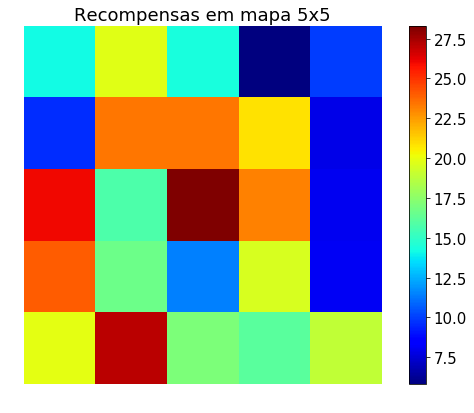

In [33]:
get_random_sampling_points(10, 50, 5, 5, 10)

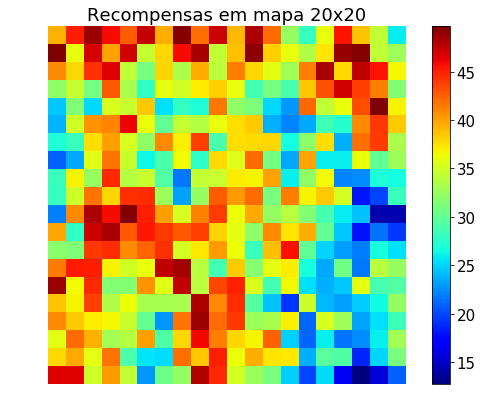

In [37]:
get_random_sampling_points(10, 50, 20, 20, 10)

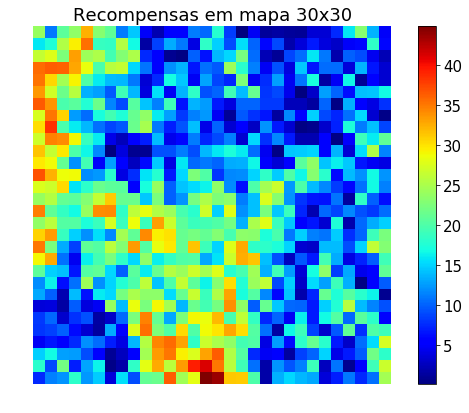

In [38]:
get_random_sampling_points(10, 50, 30, 30, 10)

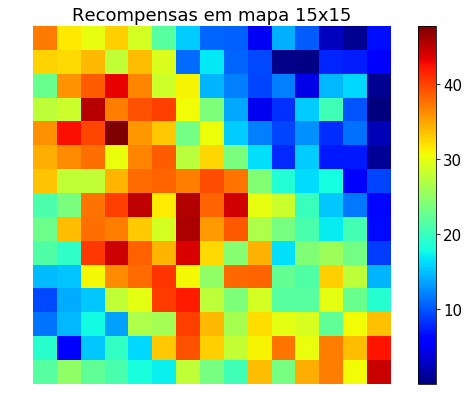

In [39]:
get_random_sampling_points(10, 50, 15, 15, 10)

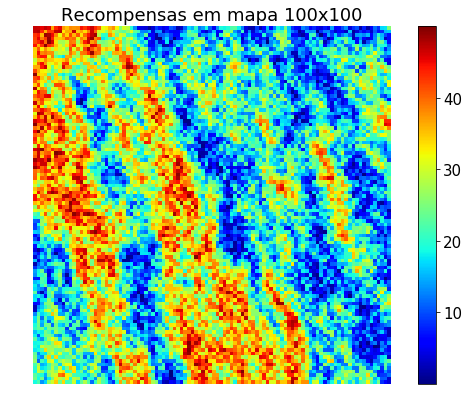

In [2]:
get_random_sampling_points(10, 50, 100, 100, 10)

### Rascunhos

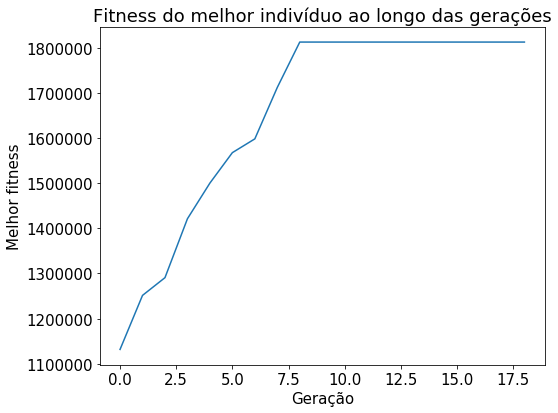

In [4]:
with open('stats.csv', 'r') as file:
    line = file.readline()
    generations = []
    fitnesses = []
    
    line = file.readline()
    while line:
        pieces = line.split(',')
        
        generations.append(int(pieces[0]))
        fitnesses.append(float(pieces[1]))
        line = file.readline()
        
    plt.figure(figsize=FIG_SIZE)
    plt.rc('font', size=15)
    plt.title('Fitness do melhor indivíduo ao longo das gerações')
    plt.xlabel('Geração')
    plt.ylabel('Melhor fitness')
    plt.plot(generations, fitnesses)
    plt.tight_layout()
    plt.savefig('./genXfit.png', dpi=DPI)
    plt.show()